In [1]:
import os
import sys
import pandas as pd
import json
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Only run this cell once to avoid confusion with directories
os.chdir('..')

In [2]:
# When starting work - assumes you are not in an active pipenv
# git branch branch_name (creates branch)
# git checkout branch_name (you are in this branch now)
# git pull origin master (updates branch with the master code)
# pipenv shell (activates up-to-date pipenv from master)
# jupyter notebook
# Add changes gradually
# git add . (stages every change) or filepath if want specific
# git commit -m "Message of what I did"
# git push (others can see what I did)

In [3]:
data_dir = '/data/'
main_dir = os.getcwd()  # ~/datatonic-challenge/
sys.path.insert(0, os.path.abspath(main_dir + '/utils/'))

# Import Matthew's function
from util import retrieve_category

In [4]:
# Copying Ivan's functions
def list_to_dict(dict_list):
    new_dict = {}
    for k,v in [(key, d[key]) for d in dict_list for key in d]:
        if k not in new_dict: 
            new_dict[k]=[v]
        else: 
            new_dict[k].append(v)
        
    return new_dict

def convert_to_dict(df, subset):
    
    data = df.copy()
    
    for column in subset: #iterating through every column that needs to be converted to dict
        for i in range(len(df)): #iterating through every movie
            str_entry = data[column][i] #get the contents of the entry as string
            list_of_dict = json.loads(str_entry) #convert string into a list of dictionaries
            df[column][i] = list_to_dict(list_of_dict) #convert list of dictionaries to one dictionary

    df.to_pickle(main_dir + data_dir + "pre-processed/movie_details_neat.pkl")
    
    return df

def make_id_maps(df, subset):
    
    data_copy = df.copy()
    id_maps = {'genres'               : {},
               'keywords'             : {}, 
               'production_companies' : {},
               'production_countries' : {},
               'spoken_languages'     : {}}

    for column in subset: 
        dict_list = []
        for i in range(len(data_copy)):
            dict_list.append(data_copy[column][i]) #add all dictionaries into one list
        #create a new dictionary from the list, this only has as many entries as there are unique values
        new_dict = list_to_dict(dict_list)
        keys = list(new_dict)
        assert len(keys) == 2 #only id and name corresponding to the id

        id_list = []
        name_list = []
        new_dict
        for i in range(len(new_dict[keys[0]])):
            if column == 'production_companies': #id and name are rversed but only for production companies
                id_list += new_dict[keys[1]][i]
                name_list += new_dict[keys[0]][i]
            else:    
                id_list += new_dict[keys[0]][i]
                name_list += new_dict[keys[1]][i]
        id_map_per_column = dict(zip(id_list, name_list))
        id_maps[column] = id_map_per_column

    #save the file as json
    with open(main_dir + data_dir + 'pre-processed/id_maps.json', 'w') as fp:
        json.dump(id_maps, fp)
    
    return id_maps

In [5]:
# Load data
movie_details_join = pd.read_pickle(main_dir + data_dir + 'pre-processed/movie_details_join.pkl')
movie_details_join.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,genres,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,movie_id,cast,crew
0,105000000,64682,61.196071,351040419,143.0,7.3,3769,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Great Gatsby,An adaptation of F. Scott Fitzgerald's Long Is...,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-05-10,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",64682,"[{""cast_id"": 2, ""character"": ""Jay Gatsby"", ""cr...","[{""credit_id"": ""52fe46e3c3a368484e0a982d"", ""de..."
1,150000000,9543,62.169881,335154643,116.0,6.2,2317,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 1241, ""name"": ""persia""}, {""id"": 1965, ...",en,Prince of Persia: The Sands of Time,A rogue prince reluctantly joins forces with a...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-05-19,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",9543,"[{""cast_id"": 5, ""character"": ""Prince Dastan"", ...","[{""credit_id"": ""567e74d4c3a36860e9008e46"", ""de..."
2,140000000,5174,22.571780,258022233,91.0,6.1,783,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...","[{""id"": 1704, ""name"": ""ambassador""}]",en,Rush Hour 3,After an attempted assassination on Ambassador...,"[{""name"": ""New Line Cinema"", ""id"": 12}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-08-08,"[{""iso_639_1"": ""la"", ""name"": ""Latin""}, {""iso_6...",5174,"[{""cast_id"": 2, ""character"": ""Det. James Carte...","[{""credit_id"": ""52fe43fac3a36847f807b5bd"", ""de..."
3,145000000,1735,60.034162,401128639,112.0,5.2,1387,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",[],en,The Mummy: Tomb of the Dragon Emperor,"Archaeologist Rick O'Connell travels to China,...","[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2008-07-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1735,"[{""cast_id"": 1, ""character"": ""Richard O'Connel...","[{""credit_id"": ""52fe4312c3a36847f80384c5"", ""de..."
4,27000000,79698,2.418535,0,109.0,4.8,34,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",[],en,The Lovers,The Lovers is an epic romance time travel adve...,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",79698,"[{""cast_id"": 11, ""character"": ""James Stewart /...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de..."


In [6]:
# List of columns that need to be converted from string to dictionary 
cols_to_dict = ['genres', 'keywords', 'production_companies', 'production_countries', 
                'spoken_languages', 'cast', 'crew']

movie_details_neat = convert_to_dict(movie_details_join.copy(), cols_to_dict)
movie_details_neat.head()

/Users/danielluo/.local/share/virtualenvs/datatonic-challenge-wMkDpaSv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,budget,id,popularity,revenue,runtime,vote_average,vote_count,genres,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,movie_id,cast,crew
0,105000000,64682,61.196071,351040419,143.0,7.3,3769,"{'id': [18, 10749], 'name': ['Drama', 'Romance']}","{'id': [818, 1326, 1523, 3929, 209714], 'name'...",en,The Great Gatsby,An adaptation of F. Scott Fitzgerald's Long Is...,"{'name': ['Village Roadshow Pictures', 'Bazmar...","{'iso_3166_1': ['US', 'AU'], 'name': ['United ...",2013-05-10,"{'iso_639_1': ['en'], 'name': ['English']}",64682,"{'cast_id': [2, 5, 3, 8, 6, 4, 7, 22, 13, 23, ...","{'credit_id': ['52fe46e3c3a368484e0a982d', '52..."
1,150000000,9543,62.169881,335154643,116.0,6.2,2317,"{'id': [12, 14, 28, 10749], 'name': ['Adventur...","{'id': [1241, 1965, 12653, 12654, 12655, 41645...",en,Prince of Persia: The Sands of Time,A rogue prince reluctantly joins forces with a...,"{'name': ['Walt Disney Pictures', 'Jerry Bruck...","{'iso_3166_1': ['US'], 'name': ['United States...",2010-05-19,"{'iso_639_1': ['en'], 'name': ['English']}",9543,"{'cast_id': [5, 2, 7, 4, 6, 8, 9, 10, 26, 27, ...","{'credit_id': ['567e74d4c3a36860e9008e46', '52..."
2,140000000,5174,22.571780,258022233,91.0,6.1,783,"{'id': [28, 35, 80, 53], 'name': ['Action', 'C...","{'id': [1704], 'name': ['ambassador']}",en,Rush Hour 3,After an attempted assassination on Ambassador...,"{'name': ['New Line Cinema'], 'id': [12]}","{'iso_3166_1': ['US'], 'name': ['United States...",2007-08-08,"{'iso_639_1': ['la', 'en', 'fr', 'ja', 'zh'], ...",5174,"{'cast_id': [2, 3, 4, 5, 6, 7, 8, 9, 26, 27, 2...","{'credit_id': ['52fe43fac3a36847f807b5bd', '52..."
3,145000000,1735,60.034162,401128639,112.0,5.2,1387,"{'id': [12, 28, 14], 'name': ['Adventure', 'Ac...",{},en,The Mummy: Tomb of the Dragon Emperor,"Archaeologist Rick O'Connell travels to China,...","{'name': ['Universal Pictures', 'China Film Co...","{'iso_3166_1': ['DE', 'US'], 'name': ['Germany...",2008-07-01,"{'iso_639_1': ['en', 'zh', 'sa'], 'name': ['En...",1735,"{'cast_id': [1, 2, 8, 12, 13, 14, 15, 16, 17, ...","{'credit_id': ['52fe4312c3a36847f80384c5', '52..."
4,27000000,79698,2.418535,0,109.0,4.8,34,"{'id': [28, 12, 878, 10749], 'name': ['Action'...",{},en,The Lovers,The Lovers is an epic romance time travel adve...,"{'name': ['Corsan', 'Bliss Media', 'Limelight ...","{'iso_3166_1': ['AU', 'BE', 'IN'], 'name': ['A...",2015-02-13,"{'iso_639_1': ['en'], 'name': ['English']}",79698,"{'cast_id': [11, 13, 22, 17, 14, 15, 16, 18, 1...","{'credit_id': ['52fe49e0c3a368484e145067', '57..."


In [7]:
with open(main_dir + data_dir + 'pre-processed/id_maps.json', 'r') as f:
    id_maps = json.load(f)

# Obtain id maps (skipping cast and crew since more complicated, i.e. 2 keys))
id_maps = make_id_maps(movie_details_neat, cols_to_dict[:-2])
id_maps['genres']

{18: 'Drama',
 10749: 'Romance',
 12: 'Adventure',
 14: 'Fantasy',
 28: 'Action',
 35: 'Comedy',
 80: 'Crime',
 53: 'Thriller',
 878: 'Science Fiction',
 27: 'Horror',
 9648: 'Mystery',
 10751: 'Family',
 16: 'Animation',
 10752: 'War',
 36: 'History',
 37: 'Western',
 10402: 'Music',
 99: 'Documentary',
 10769: 'Foreign',
 10770: 'TV Movie'}

In [8]:
drama_movies = retrieve_category(movie_details_neat, column_name='genres', ids=12, id_key_name='id', id_maps=id_maps)

drama_movies.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,genres,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,movie_id,cast,crew
0,150000000,9543,62.169881,335154643,116.0,6.2,2317,"{'id': [12, 14, 28, 10749], 'name': ['Adventur...","{'id': [1241, 1965, 12653, 12654, 12655, 41645...",en,Prince of Persia: The Sands of Time,A rogue prince reluctantly joins forces with a...,"{'name': ['Walt Disney Pictures', 'Jerry Bruck...","{'iso_3166_1': ['US'], 'name': ['United States...",2010-05-19,"{'iso_639_1': ['en'], 'name': ['English']}",9543,"{'cast_id': [5, 2, 7, 4, 6, 8, 9, 10, 26, 27, ...","{'credit_id': ['567e74d4c3a36860e9008e46', '52..."
1,145000000,1735,60.034162,401128639,112.0,5.2,1387,"{'id': [12, 28, 14], 'name': ['Adventure', 'Ac...",{},en,The Mummy: Tomb of the Dragon Emperor,"Archaeologist Rick O'Connell travels to China,...","{'name': ['Universal Pictures', 'China Film Co...","{'iso_3166_1': ['DE', 'US'], 'name': ['Germany...",2008-07-01,"{'iso_639_1': ['en', 'zh', 'sa'], 'name': ['En...",1735,"{'cast_id': [1, 2, 8, 12, 13, 14, 15, 16, 17, ...","{'credit_id': ['52fe4312c3a36847f80384c5', '52..."
2,27000000,79698,2.418535,0,109.0,4.8,34,"{'id': [28, 12, 878, 10749], 'name': ['Action'...",{},en,The Lovers,The Lovers is an epic romance time travel adve...,"{'name': ['Corsan', 'Bliss Media', 'Limelight ...","{'iso_3166_1': ['AU', 'BE', 'IN'], 'name': ['A...",2015-02-13,"{'iso_639_1': ['en'], 'name': ['English']}",79698,"{'cast_id': [11, 13, 22, 17, 14, 15, 16, 18, 1...","{'credit_id': ['52fe49e0c3a368484e145067', '57..."
3,15000000,315011,9.476999,77000000,120.0,6.5,143,"{'id': [28, 12, 18, 27, 878], 'name': ['Action...","{'id': [1299, 7671, 11100, 14796, 161791, 2355...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,"{'name': ['Cine Bazar', 'Toho Pictures'], 'id'...","{'iso_3166_1': ['JP'], 'name': ['Japan']}",2016-07-29,"{'iso_639_1': ['it', 'de', 'en', 'ja'], 'name'...",315011,"{'cast_id': [4, 2, 3, 5, 50, 10, 84, 24, 29, 2...","{'credit_id': ['5921d321c3a368799b05933f', '59..."
4,150000000,27022,35.580815,215283742,109.0,5.8,1470,"{'id': [14, 12, 28, 35, 18], 'name': ['Fantasy...","{'id': [616, 657, 1994, 2098, 2343, 3096, 3098...",en,The Sorcerer's Apprentice,Balthazar Blake is a master sorcerer in modern...,"{'name': ['Walt Disney Pictures', 'Jerry Bruck...","{'iso_3166_1': ['US'], 'name': ['United States...",2010-07-13,"{'iso_639_1': ['en'], 'name': ['English']}",27022,"{'cast_id': [4, 5, 6, 7, 9, 10, 11, 18, 13, 14...","{'credit_id': ['52fe4528c3a368484e04b981', '56..."


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
movie_details_numeric = pd.read_pickle(main_dir + data_dir + "pre-processed/movie_encoded_only_numeric.pkl")
movie_details_numeric.tail()

,budget,popularity,revenue,runtime,vote_average,vote_count,crew,lead_male,lead_female,lead2_male,...,Yasiin Bey,Yul Vazquez,Zac Efron,Zach Galifianakis,Zachary Woodlee,Zak Penn,Zeljko Ivanek,Zhang Ziyi,Zoe Saldana,Zooey Deschanel
id,,,,,,,,,,,,,,,,,,,,,
9367,220000,14.269792,2040920,81.0,6.6,238,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
72766,9000,0.642552,0,85.0,5.9,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
231617,0,1.444476,0,120.0,7.0,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
126186,0,0.857008,0,98.0,5.7,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25975,0,1.929883,0,90.0,6.3,16,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


[[ 9.83275662e+06]
 [ 3.59640337e+07]
 [ 8.81979496e+07]
 [ 3.18574675e+07]
 [-1.05390031e+06]
 [ 5.66195877e+07]
 [ 9.26403535e+06]
 [ 1.00676776e+08]
 [ 3.87708219e+07]
 [ 7.48122052e+06]
 [ 4.00850359e+07]
 [ 6.85890425e+07]
 [ 7.58233691e+07]
 [ 3.04012374e+07]
 [ 3.64525949e+07]
 [ 9.74392547e+06]
 [ 6.35946998e+07]
 [ 2.22633062e+07]
 [ 8.58592440e+07]
 [ 1.79023201e+08]
 [ 3.35259561e+07]
 [ 2.48094079e+08]
 [ 2.48930764e+08]
 [ 1.93672703e+07]
 [ 7.04400540e+07]
 [ 3.70804929e+07]
 [ 6.01975770e+07]
 [ 2.56128499e+07]
 [ 1.39736082e+08]
 [ 1.30548929e+07]
 [ 1.74109289e+07]
 [ 5.80133826e+07]
 [ 4.76628593e+07]
 [-1.67353446e+05]
 [ 3.30376482e+06]
 [ 8.68190547e+07]
 [ 1.03588349e+08]
 [ 1.01866350e+08]
 [ 1.28331511e+08]
 [ 6.25905819e+07]
 [ 3.27503585e+07]
 [ 5.77987700e+07]
 [ 2.09290336e+07]
 [ 1.16946633e+08]
 [ 1.01780214e+07]
 [ 1.65186636e+08]
 [ 1.19415702e+07]
 [ 3.70002643e+06]
 [ 2.14260863e+07]
 [ 7.41614582e+07]
 [ 2.47187914e+08]
 [ 5.95565226e+06]
 [ 3.7367190

0.4502587328842349

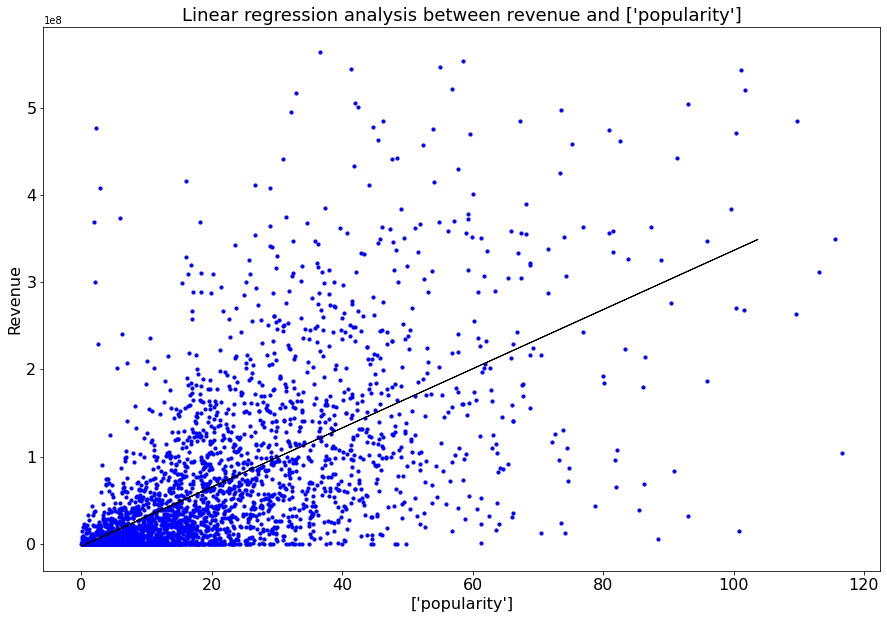

In [113]:
from sklearn.model_selection import train_test_split

def multivariate_linear_regression(cols_X, col_Y='revenue', test_fraction=0.2, plot=False):
    
    Y = movie_details_numeric[col_Y].to_numpy().reshape(-1, 1)
    X = movie_details_numeric[cols_X].to_numpy().reshape(-1, len(cols_X))
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_fraction)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Make predictions using the testing set
    Y_pred = regr.predict(X_test)
    print(Y_pred)
    # The coefficients
    print('Slope for linear regression with respect to each variable: \n', regr.coef_)

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination:', round(r2_score(Y_test, Y_pred), 2))

    if plot and len(cols_X) == 1:
        
        fig = plt.figure(figsize=(15,10))
        plt.title(f'Linear regression analysis between {col_Y} and {cols_X}'.replace("_", " "),
                  fontsize=18)
        plt.scatter(X_train, Y_train,  color='blue', s=10.0)
        plt.plot(X_test, Y_pred, color='black', linewidth=1)
        plt.ylabel(f'{col_Y}'.replace("_", " ").capitalize(), fontsize=16)
        plt.xlabel(f'{cols_X}'.replace("_", " ").capitalize(), fontsize=16)
        plt.yticks(fontsize=16)
        plt.xticks(fontsize=16)

    return r2_score(Y_test, Y_pred)

# Demo
multivariate_linear_regression('popularity', plot=True)